# Customer Segmentation Classification

### import librairies 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import missingno as ms 
import seaborn as sns 
import sklearn

In [2]:
data=pd.read_csv('Test.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [3]:
data.shape

(2627, 11)

In [4]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

visualisation of lissing values 

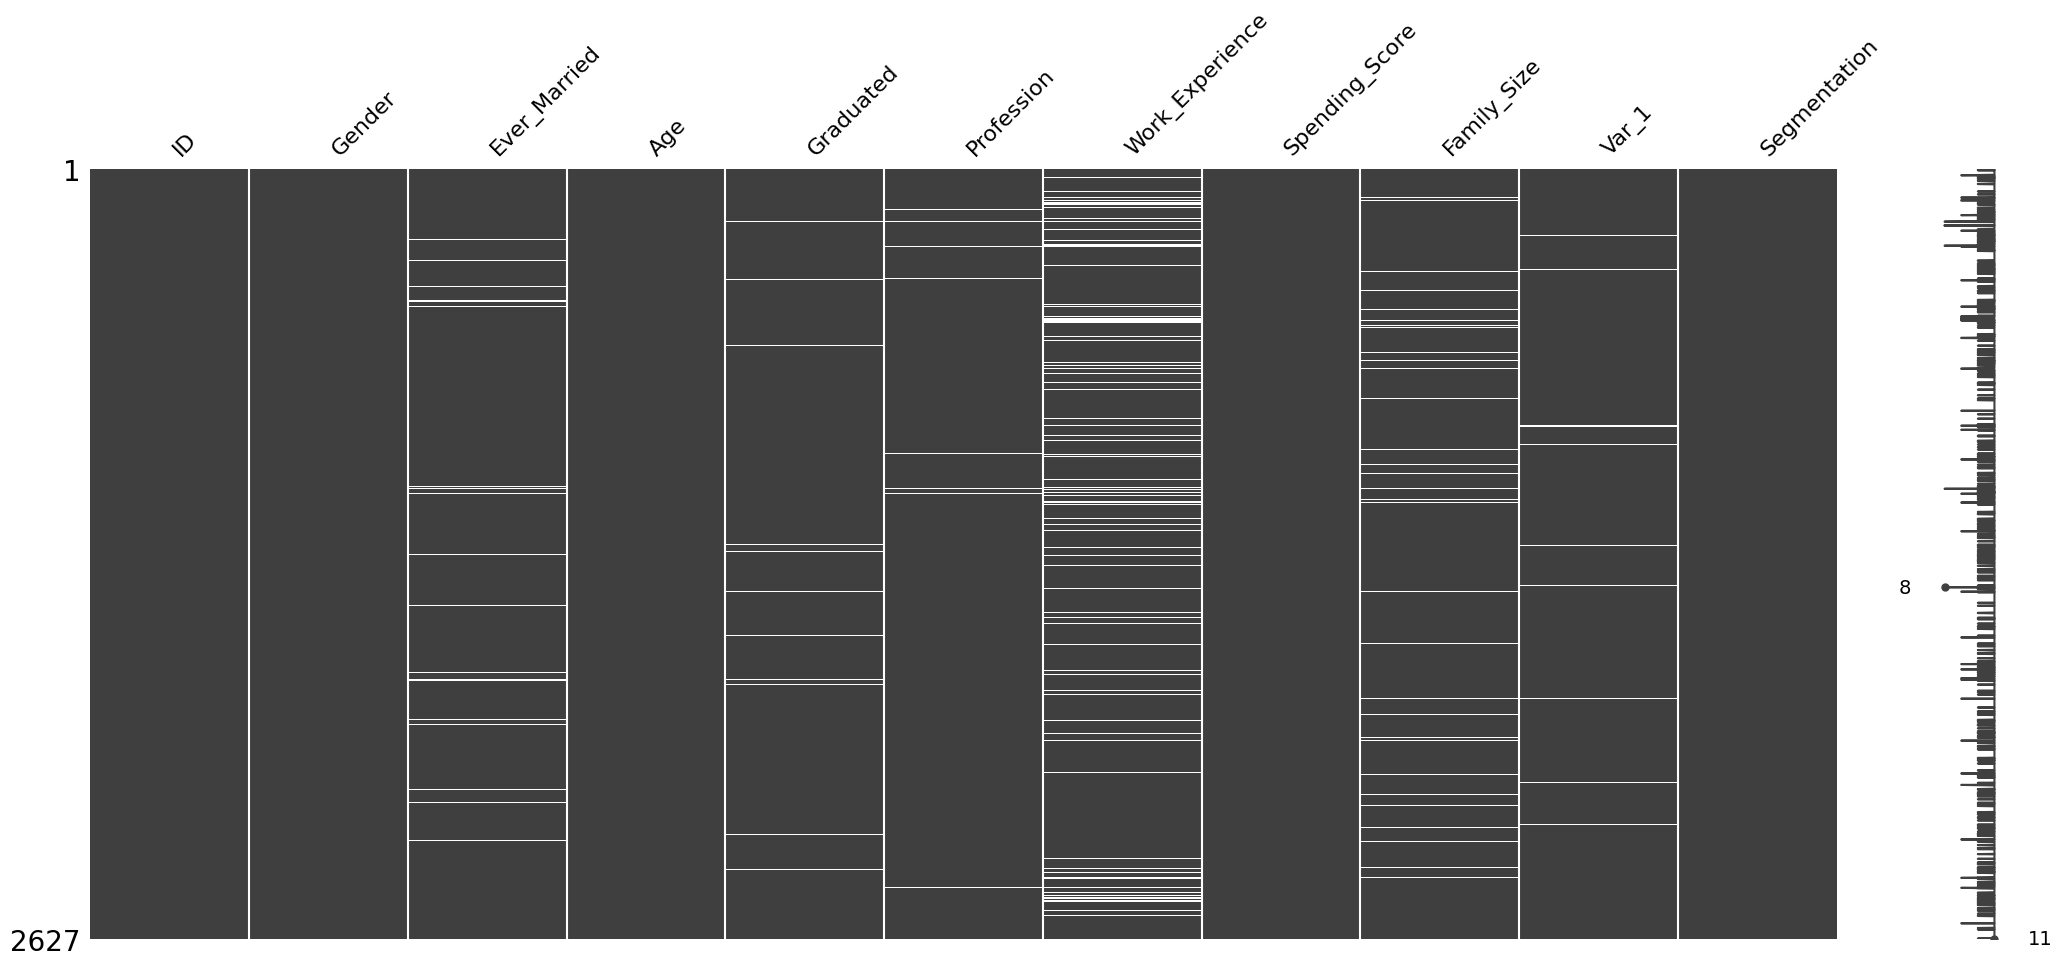

In [5]:
ms.matrix(data)
plt.show()

remove missing data

In [6]:
data=data.dropna()
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [7]:
data.shape

(2154, 11)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2154.0,463496.744661,2591.465156,458989.0,461282.25,463535.0,465705.75,467968.0
Age,2154.0,43.461467,16.761895,18.0,30.00,41.0,52.00,89.0
Work_Experience,2154.0,2.551532,3.344917,0.0,0.00,1.0,4.00,14.0
Family_Size,2154.0,2.837047,1.566872,1.0,2.00,2.0,4.00,9.0


encoding male with 0 and female with 1

In [9]:
data['Gender']=data['Gender'].replace({'Female':1,'Male':0})
data['Gender'][0]


C:\Users\andyl\AppData\Local\Temp\ipykernel_36264\4122871334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']=data['Gender'].replace({'Female':1,'Male':0})


1

In [10]:
men_groupeA= data[(data['Gender']==0) &( data['Segmentation']=='A')]
men_groupeA.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,376.0,463604.837766,2553.147587,458994.0,461456.75,463534.5,465819.25,467894.0
Gender,376.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,376.0,42.234043,16.274266,18.0,30.00,39.0,52.00,89.0
Work_Experience,376.0,2.853723,3.635732,0.0,0.00,1.0,5.00,14.0
Family_Size,376.0,3.000000,1.521403,1.0,2.00,3.0,4.00,8.0


In [11]:
men_groupeA.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,458994,0,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
12,459024,0,Yes,50,Yes,Artist,1.0,Average,5.0,Cat_6,A
22,459058,0,No,42,Yes,Artist,0.0,Low,4.0,Cat_3,A
36,459106,0,Yes,62,Yes,Artist,0.0,Low,2.0,Cat_6,A
42,459120,0,No,19,No,Healthcare,5.0,Low,5.0,Cat_2,A


let's visualize this with a boxplot 

Text(0.5, 1.0, 'age des hommes dans le groupe A')

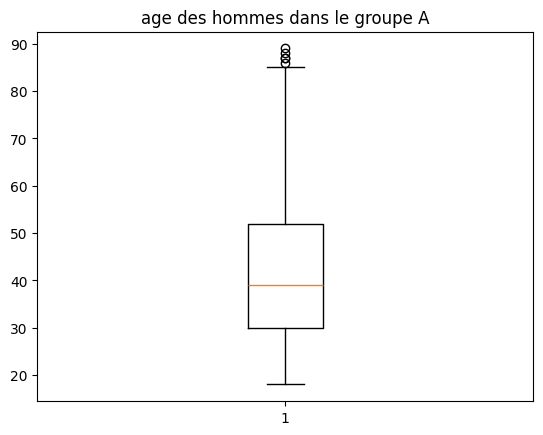

In [12]:
plt.boxplot(men_groupeA['Age'])
plt.title("age des hommes dans le groupe A")

<Axes: >

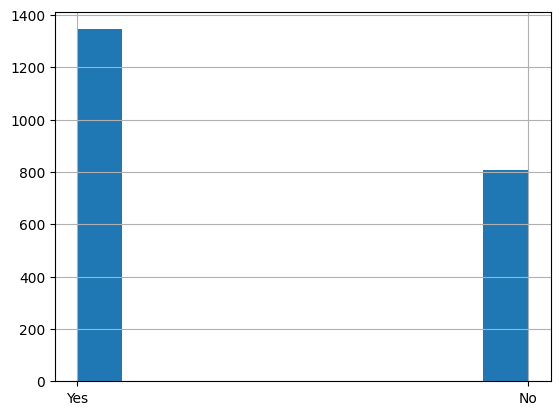

In [13]:
data['Graduated'].hist()

In [14]:
groupeA=data[data['Segmentation']=='A']
groupeA.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,458994,0,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
12,459024,0,Yes,50,Yes,Artist,1.0,Average,5.0,Cat_6,A
22,459058,0,No,42,Yes,Artist,0.0,Low,4.0,Cat_3,A
28,459077,1,Yes,79,No,Lawyer,1.0,High,2.0,Cat_6,A
36,459106,0,Yes,62,Yes,Artist,0.0,Low,2.0,Cat_6,A


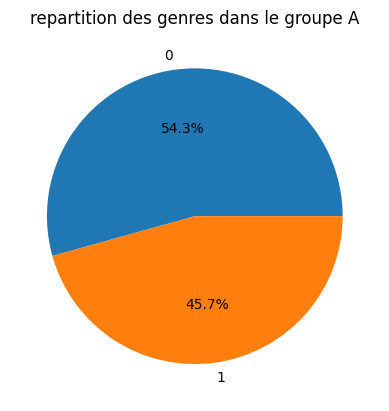

In [15]:
part=groupeA[groupeA['Segmentation']=='A']['Gender'].value_counts()
plt.pie(part,labels=part.index,autopct='%1.1f%%')
plt.title("repartition des genres dans le groupe A")
plt.show()

# 0 pour homme et 1 pour femme 

In [16]:
groupeA=groupeA.drop(['ID','Segmentation','Var_1'],axis=1)
groupeA.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
1,0,Yes,37,Yes,Healthcare,8.0,Average,4.0
12,0,Yes,50,Yes,Artist,1.0,Average,5.0
22,0,No,42,Yes,Artist,0.0,Low,4.0
28,1,Yes,79,No,Lawyer,1.0,High,2.0
36,0,Yes,62,Yes,Artist,0.0,Low,2.0


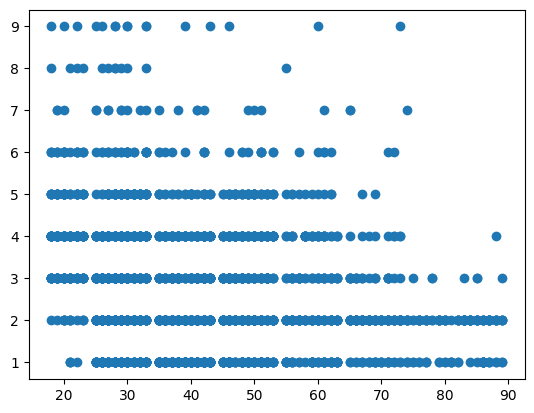

In [50]:
plt.scatter(data['Age'],data['Family_Size'])

# encoding 

let's encode the categorical values with a onehotencoder 


In [17]:
groupeA['Ever_Married']=groupeA['Ever_Married'].replace({'Yes':1,'No':0})
groupeA['Graduated']=groupeA['Graduated'].replace({'Yes':1,'No':0})

C:\Users\andyl\AppData\Local\Temp\ipykernel_36264\2330190009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  groupeA['Ever_Married']=groupeA['Ever_Married'].replace({'Yes':1,'No':0})
C:\Users\andyl\AppData\Local\Temp\ipykernel_36264\2330190009.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  groupeA['Graduated']=groupeA['Graduated'].replace({'Yes':1,'No':0})


In [18]:
groupeA.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoding the categorical value and merging the original dataset with them use of a "get dummies " for save the name of the columns 


In [20]:
# Liste des colonnes catégorielles à encoder
cat_col = ['Profession', 'Spending_Score']

# Initialiser l'encodeur
encoder = OneHotEncoder(sparse_output=False)

# Transformation des colonnes catégorielles
encoded_col = encoder.fit_transform(groupeA[cat_col])

# Créer un DataFrame avec les valeurs encodées
encoded_data = pd.DataFrame(
    encoded_col,
    columns=encoder.get_feature_names_out(cat_col)
)

# Réinitialiser les index des DataFrames avant de les concaténer
groupeA_reset = groupeA.drop(cat_col, axis=1).reset_index(drop=True)
encoded_data_reset = encoded_data.reset_index(drop=True)

# Concaténer les DataFrames
new_data = pd.concat([groupeA_reset, encoded_data_reset], axis=1)



In [21]:
# Afficher les premières lignes du nouveau DataFrame pour vérification
new_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0,1,37,1,8.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,50,1,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,42,1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,79,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,1,62,1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
new_data.isnull().sum()

Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Work_Experience             0
Family_Size                 0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
dtype: int64

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    692 non-null    int64  
 1   Ever_Married              692 non-null    int64  
 2   Age                       692 non-null    int64  
 3   Graduated                 692 non-null    int64  
 4   Work_Experience           692 non-null    float64
 5   Family_Size               692 non-null    float64
 6   Profession_Artist         692 non-null    float64
 7   Profession_Doctor         692 non-null    float64
 8   Profession_Engineer       692 non-null    float64
 9   Profession_Entertainment  692 non-null    float64
 10  Profession_Executive      692 non-null    float64
 11  Profession_Healthcare     692 non-null    float64
 12  Profession_Homemaker      692 non-null    float64
 13  Profession_Lawyer         692 non-null    float64
 14  Profession

corr matrix 

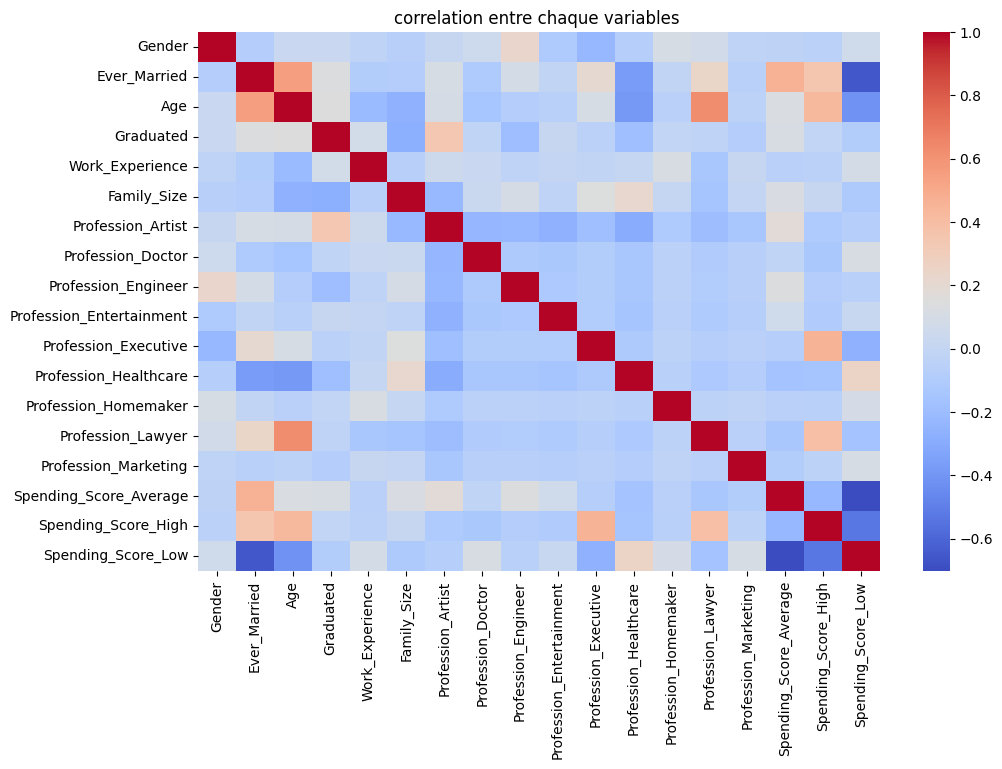

In [24]:
matrix=new_data.corr()
plt.figure(figsize=(11,7))
sns.heatmap(matrix,cmap='coolwarm')
plt.title("correlation entre chaque variables ")
plt.show()

In [25]:
new_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0,1,37,1,8.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,50,1,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,42,1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,79,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,1,62,1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


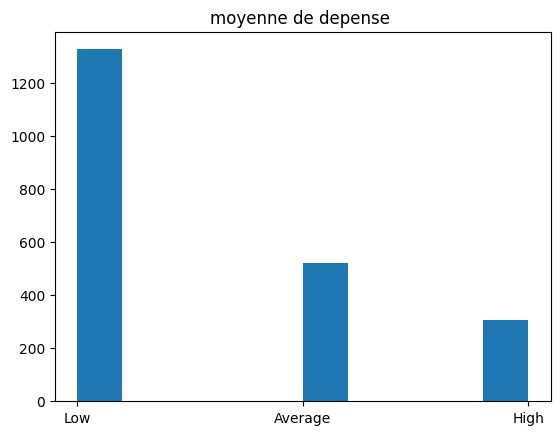

In [26]:
plt.hist(data['Spending_Score'])
plt.title('moyenne de depense ')
plt.show()

# prediction models 

let's try to predict the age of of a customers 


# Linear regression 

In [27]:

x = new_data.drop(columns=['Age']).values

y = new_data['Age'].values


In [28]:
print(y)

[37 50 42 79 62 19 86 48 35 62 46 43 89 67 32 58 30 37 30 42 70 22 35 55
 35 88 30 21 66 50 40 48 67 28 37 35 33 49 79 40 42 88 45 18 46 72 40 38
 43 49 42 31 18 28 36 50 33 38 43 53 36 36 36 66 62 53 39 37 41 46 47 39
 25 41 37 51 39 19 83 27 33 39 35 52 28 38 35 41 43 29 27 35 39 49 38 28
 40 28 25 42 47 26 30 31 31 41 40 33 52 27 29 32 49 33 39 31 36 23 83 41
 68 45 86 62 42 26 20 20 30 83 53 29 19 27 60 25 65 61 42 19 53 36 23 37
 41 36 29 26 30 28 33 31 45 47 20 42 40 49 25 71 29 47 47 40 60 32 56 45
 37 57 50 31 76 83 36 33 56 50 32 30 40 27 61 33 28 32 82 46 30 65 39 82
 87 79 43 25 25 59 32 36 45 39 25 38 76 28 42 45 18 36 32 56 35 38 26 56
 40 43 22 33 39 49 38 38 35 61 19 72 49 41 65 42 49 40 27 80 79 25 31 31
 63 71 31 60 51 31 32 66 22 63 39 31 43 52 36 30 28 35 41 39 29 33 32 19
 30 31 37 38 43 49 52 66 37 33 26 19 20 21 51 32 25 29 39 25 31 43 77 42
 52 56 38 28 84 37 38 35 46 35 36 57 51 59 50 39 39 52 26 21 51 45 20 29
 41 30 20 40 53 35 38 46 25 27 42 26 52 57 43 43 47

In [29]:
print(x)

[[0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]]


# Spliting data 

In [30]:
x.shape

(692, 17)

In [31]:
y.reshape(-1,1).shape

(692, 1)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [33]:
y_train.shape 

(553,)

In [34]:
x_train.shape 

(553, 17)

# features Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(x_train)
scalery = StandardScaler().fit(y_train.reshape(-1,1))

x_train = scalerX.transform(x_train)
x_test = scalerX.transform(x_test)

#as the quality is a continious variable it's can be good to standandardize them 
y_train = scalery.transform(y_train.reshape(-1,1))
y_test = scalery.transform(y_test.reshape(-1,1))

# Training of the model 

In [36]:
from sklearn.linear_model import  LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# predicting the test set results 

In [37]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2) #two digits after point (decimals)
print(
    np.concatenate(
        (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1
        )
      )


[[-1.1  -0.57]
 [-0.27 -0.57]
 [ 0.19 -0.45]
 [-0.94 -1.07]
 [ 0.73  0.23]
 [ 0.19  0.85]
 [ 0.44  1.65]
 [ 0.79  0.85]
 [-1.03 -1.5 ]
 [-1.32 -0.88]
 [-0.98 -1.38]
 [-0.15 -0.63]
 [ 0.44  1.28]
 [ 0.83  2.52]
 [-0.25 -0.2 ]
 [ 0.66 -0.14]
 [ 0.4   1.53]
 [ 0.37  0.91]
 [ 0.46 -0.2 ]
 [ 0.43  0.17]
 [ 2.33  1.78]
 [ 0.03 -1.07]
 [-0.07 -0.26]
 [ 0.48  0.6 ]
 [-0.34  0.23]
 [ 0.62 -0.45]
 [ 0.1  -0.2 ]
 [-0.26 -0.39]
 [-1.18 -1.44]
 [-0.33 -0.26]
 [-0.26 -0.94]
 [ 0.44 -0.82]
 [ 1.99  1.41]
 [-0.04 -0.94]
 [ 0.09  0.05]
 [ 2.38  2.33]
 [-0.62 -0.45]
 [ 0.13  0.05]
 [ 0.11  0.54]
 [-1.12 -1.44]
 [ 0.41  1.28]
 [-0.88 -1.07]
 [-0.95 -0.76]
 [ 0.37  0.79]
 [ 2.5   1.9 ]
 [ 2.02  1.47]
 [-0.53 -0.02]
 [ 0.22  0.05]
 [-0.47 -0.2 ]
 [ 0.28  1.28]
 [-1.45 -1.31]
 [-1.44 -0.94]
 [-0.93 -0.94]
 [ 0.52  0.23]
 [-0.62  1.47]
 [-0.36 -0.39]
 [ 0.24  1.9 ]
 [ 0.36 -0.2 ]
 [-0.64 -1.25]
 [-0.9  -0.32]
 [ 0.47  0.36]
 [-0.46 -0.2 ]
 [ 0.39  0.17]
 [-1.16 -1.44]
 [ 0.06 -1.07]
 [ 0.06  0.42]
 [-1.01 -0

# Model Evaluation 
as we have done some prediction let's analyze the accurracy of the model through some keys metrics 

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

X_train_inverse = scalerX.inverse_transform(x_train)
y_train_inverse = scalery.inverse_transform(y_train)


X_test_inverse = scalerX.inverse_transform(x_test)
y_test_inverse = scalery.inverse_transform(y_test)


#non standardized values
mse = sqrt(mean_squared_error(y_test_inverse, scalery.inverse_transform(y_pred)))
print('(non-standardized) mse = %.2f' % (mse))
rmse_lin = sqrt(mse)
print('(non-standardized) rmse = %.2f' % (rmse_lin))
r2 = r2_score(y_test_inverse, scalery.inverse_transform(y_pred))
print('(non-standardized) r2-score for multiple linear regression  = %.2f' % (r2))

(non-standardized) mse = 11.45
(non-standardized) rmse = 3.38
(non-standardized) r2-score for multiple linear regression  = 0.56


# DECISION TREE REGRESSION 

we start by training our model 

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state = 42)
regressor_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

# Predictions 

In [41]:
y_tree_pred = regressor_tree.predict(x_test).reshape(-1,1)
# as the decision tree is not affected by values don't need to standardize the values

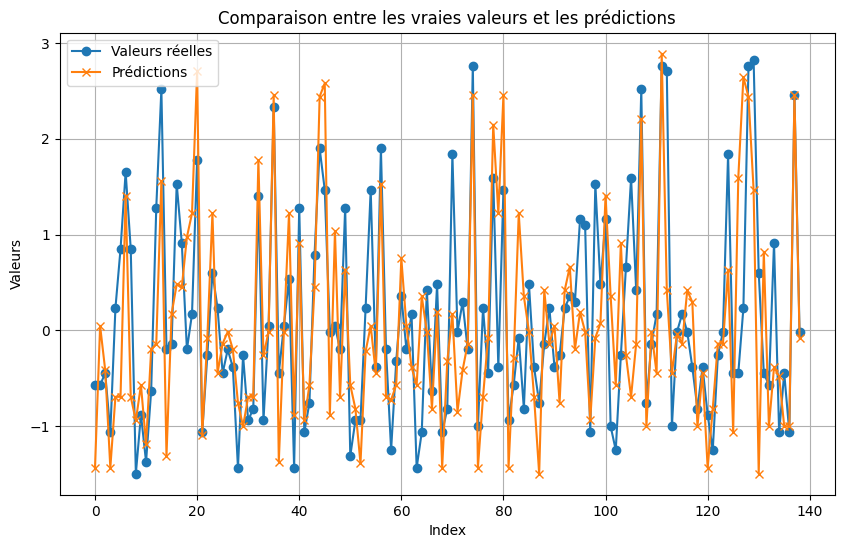

In [42]:
# Plot actual values and predictions
plt.figure(figsize=(10, 6))

# Comparison between true values (y_test) and predictions (y_tree_pred)
plt.plot(np.arange(len(y_test)), y_test, label='Valeurs réelles', marker='o')
plt.plot(np.arange(len(y_tree_pred)), y_tree_pred, label='Prédictions', marker='x')

# Labels and title
plt.xlabel('Index')
plt.ylabel('Valeurs')
plt.title('Comparaison entre les vraies valeurs et les prédictions')
plt.legend()
plt.grid(True)


plt.show()


# Model Evaluation (decision tree)

In [44]:
from sklearn.metrics import r2_score
from math import sqrt

# Calcul du R^2

r2_tree = r2_score(scalery.inverse_transform(y_test), scalery.inverse_transform(y_tree_pred))
print("R_2 Score (Accuracy-like metric):%.2f"% (r2_tree))

mse = mean_squared_error(scalery.inverse_transform(y_test),
                         scalery.inverse_transform(y_tree_pred))
print('mse = %.2f '%mse)
rmse_tree = sqrt(mse)
print('rmse = %.2f'%rmse_tree)

R_2 Score (Accuracy-like metric):0.42
mse = 173.87 
rmse = 13.19


# SUPPORT VECTOR REGRESSION 

## Training the SVR model 

In [53]:
x_train.shape

(553, 17)

In [54]:
y_train.shape

(553, 1)

In [57]:
y=y_train.reshape(-1)


In [58]:
from sklearn.svm import SVR

regressor_svr = SVR(kernel='rbf') 
regressor_svr.fit(x_train, y_train)



c:\Users\andyl\anaconda3\envs\clinic\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [59]:
# i  don't have to standardize the data before the training beacause it's was already did 

y_pred_svr = regressor.predict(x_test).reshape(-1,1)

# model evaluation (svr)

In [62]:

from sklearn.metrics import r2_score
from math import sqrt

# Calcul du R^2

r2_svr = r2_score(scalery.inverse_transform(y_test), scalery.inverse_transform(y_pred_svr))
print("R_2 Score (Accuracy-like metric):%.2f"% (r2_svr))
mse = mean_squared_error(scalery.inverse_transform(y_test),scalery.inverse_transform(y_pred_svr))
print('mse = %.2f '%mse)
rmse_svr = sqrt(mse)
print('rmse = %.2f'%rmse_svr)

R_2 Score (Accuracy-like metric):0.56
mse = 131.06 
rmse = 11.45


essayons de visualiser les prediction et les vrais valeurs 

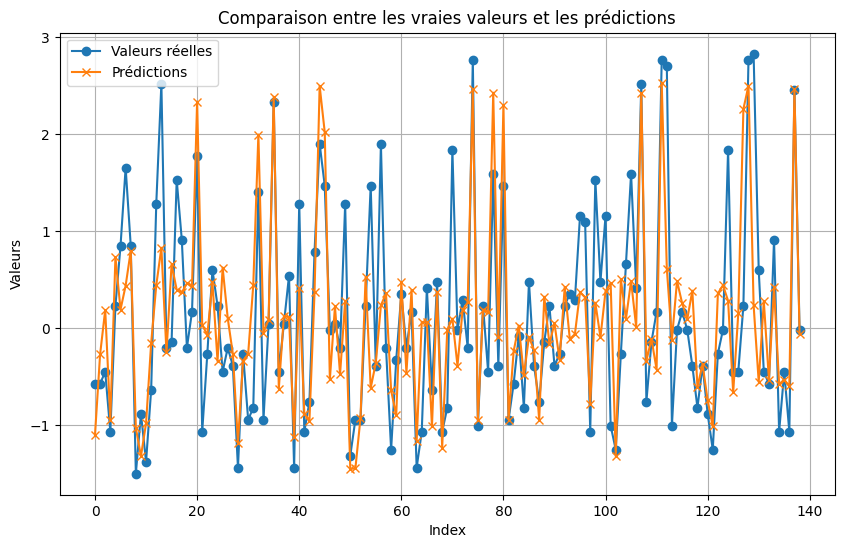

In [64]:
# Plot actual values and predictions
plt.figure(figsize=(10, 6))

# Comparison between true values (y_test) and predictions (y_tree_pred)
plt.plot(np.arange(len(y_test)), y_test, label='Valeurs réelles', marker='o')
plt.plot(np.arange(len(y_pred_svr)), y_pred_svr, label='Prédictions', marker='x')

# Labels and title
plt.xlabel('Index')
plt.ylabel('Valeurs')
plt.title('Comparaison entre les vraies valeurs et les prédictions')
plt.legend()
plt.grid(True)


plt.show()
